# Resnet-18

# MSU-MFSD

Using TensorFlow backend.
C:\Users\prlab\.conda\envs\bjy\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\prlab\.conda\envs\bjy\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\prlab\.conda\envs\bjy\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\prlab\.conda\envs\bjy\lib\site-packages\tensorflow\py

>> model loaded: protocol_4-15-0.0946.hdf5








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           23121           8779
actual_real(1)            2972           7825

EER: 0.2753	HTER: 0.2752
>> finished


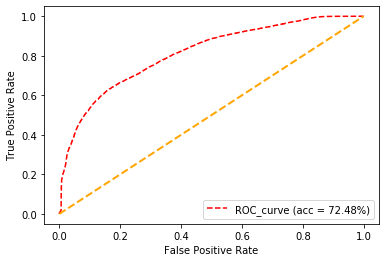

<Figure size 432x288 with 0 Axes>

In [1]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.001\\protocol_4-15-0.0946.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\MSU-MFSD\\protocol_4_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-09-0.0778.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           25533           6367
actual_real(1)            2156           8641

EER: 0.1997	HTER: 0.1996
>> finished


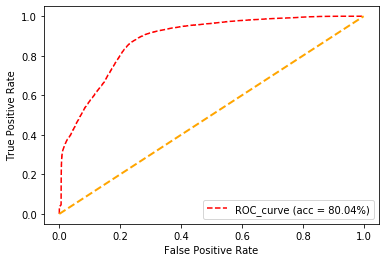

<Figure size 432x288 with 0 Axes>

In [2]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.01\\protocol_4-09-0.0778.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\MSU-MFSD\\protocol_4_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-18-0.0864.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           24562           7338
actual_real(1)            2484           8313

EER: 0.2301	HTER: 0.2300
>> finished


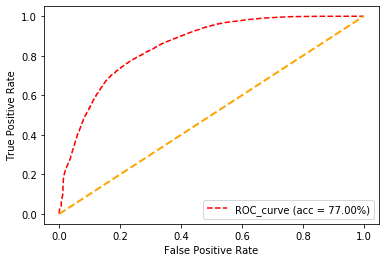

<Figure size 432x288 with 0 Axes>

In [3]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.005\\protocol_4-18-0.0864.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\MSU-MFSD\\protocol_4_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-24-0.0809.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           26247           5653
actual_real(1)            1914           8883

EER: 0.1773	HTER: 0.1772
>> finished


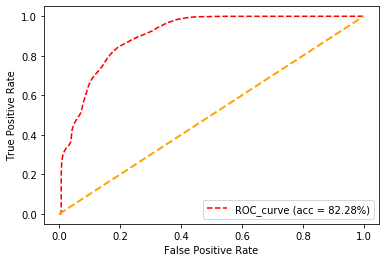

<Figure size 432x288 with 0 Axes>

In [4]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.001\\M_angle-24-0.0809.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\MSU-MFSD\\protocol_1_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-09-0.1228.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           25451           6449
actual_real(1)            2183           8614

EER: 0.2022	HTER: 0.2022
>> finished


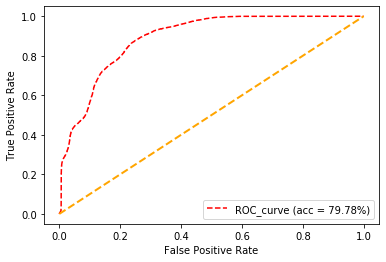

<Figure size 432x288 with 0 Axes>

In [5]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.01\\M_angle-09-0.1228.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\MSU-MFSD\\protocol_1_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-30-0.0905.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           25966           5934
actual_real(1)            2008           8789

EER: 0.1860	HTER: 0.1860
>> finished


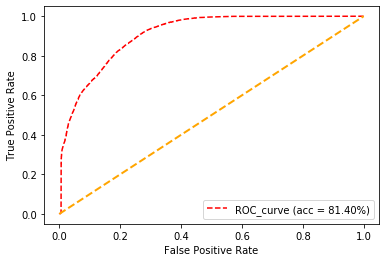

<Figure size 432x288 with 0 Axes>

In [6]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.005\\M_angle-30-0.0905.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\MSU-MFSD\\protocol_1_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: print-05-0.1357.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           19608          12292
actual_real(1)            4162           6635

EER: 0.3854	HTER: 0.3854
>> finished


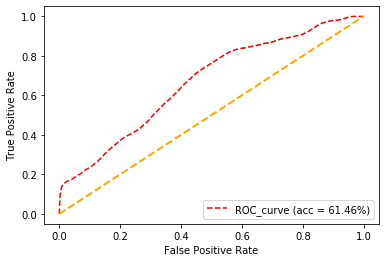

<Figure size 432x288 with 0 Axes>

In [7]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.001\\print-05-0.1357.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\MSU-MFSD\\protocol_3_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: print-11-0.0936.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           21368          10532
actual_real(1)            3565           7232

EER: 0.3302	HTER: 0.3302
>> finished


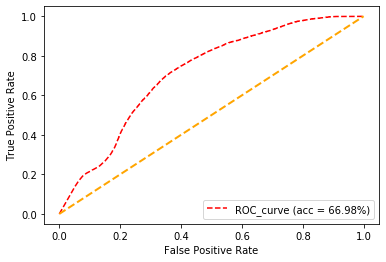

<Figure size 432x288 with 0 Axes>

In [8]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.01\\print-11-0.0936.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\MSU-MFSD\\protocol_3_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: print-17-0.1349.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           19562          12338
actual_real(1)            4178           6619

EER: 0.3868	HTER: 0.3869
>> finished


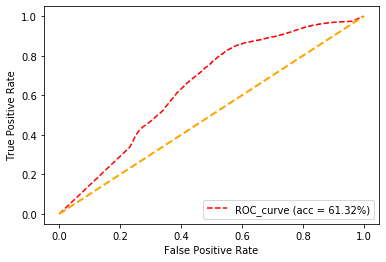

<Figure size 432x288 with 0 Axes>

In [10]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.005\\print-17-0.1349.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\MSU-MFSD\\protocol_3_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

# NUAA-PI

>> model loaded: protocol_4-15-0.0946.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8769 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            3094           2464
actual_real(1)            1425           1786

EER: 0.4434	HTER: 0.4436
>> finished


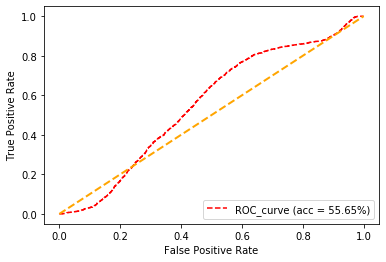

<Figure size 432x288 with 0 Axes>

In [35]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.001\\protocol_4-15-0.0946.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_4_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-09-0.0778.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8769 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            3517           2041
actual_real(1)            1180           2031

EER: 0.3672	HTER: 0.3674
>> finished


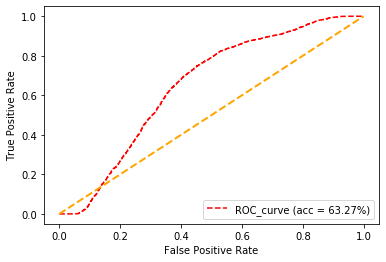

<Figure size 432x288 with 0 Axes>

In [36]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.01\\protocol_4-09-0.0778.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_4_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-18-0.0864.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8769 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            2791           2767
actual_real(1)            1599           1612

EER: 0.4978	HTER: 0.4979
>> finished


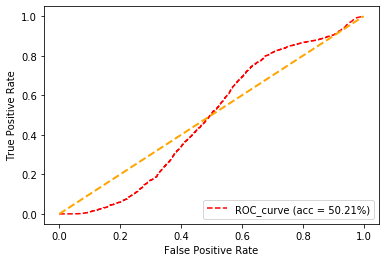

<Figure size 432x288 with 0 Axes>

In [37]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.005\\protocol_4-18-0.0864.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_4_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-24-0.0809.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8769 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            1201           4357
actual_real(1)            2518            693

EER: 0.7839	HTER: 0.7840
>> finished


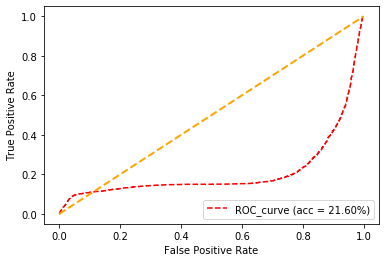

<Figure size 432x288 with 0 Axes>

In [38]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.001\\M_angle-24-0.0809.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_1_M_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-09-0.1228.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8769 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            1110           4448
actual_real(1)            2570            641

EER: 0.8004	HTER: 0.8003
>> finished


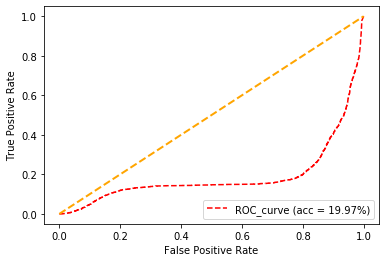

<Figure size 432x288 with 0 Axes>

In [39]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.01\\M_angle-09-0.1228.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_1_M_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-30-0.0905.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8769 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            1315           4243
actual_real(1)            2453            758

EER: 0.7635	HTER: 0.7637
>> finished


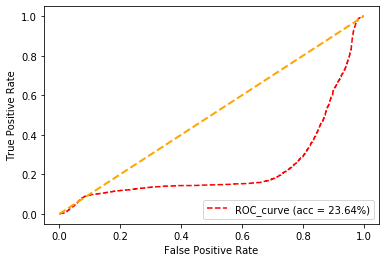

<Figure size 432x288 with 0 Axes>

In [40]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.005\\M_angle-30-0.0905.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_1_M_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: print-05-0.1357.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8769 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            2236           3322
actual_real(1)            1920           1291

EER: 0.5977	HTER: 0.5978
>> finished


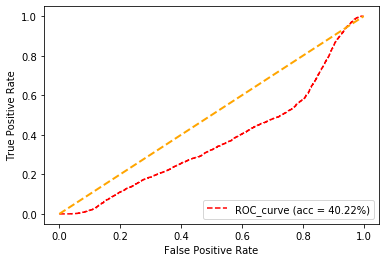

<Figure size 432x288 with 0 Axes>

In [41]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.001\\print-05-0.1357.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_3_Print_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: print-11-0.0936.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8769 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            1805           3753
actual_real(1)            2169           1042

EER: 0.6752	HTER: 0.6754
>> finished


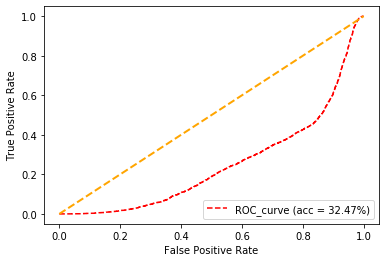

<Figure size 432x288 with 0 Axes>

In [42]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.01\\print-11-0.0936.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_3_Print_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: print-17-0.1349.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8769 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            1470           4088
actual_real(1)            2362            849

EER: 0.7354	HTER: 0.7356
>> finished


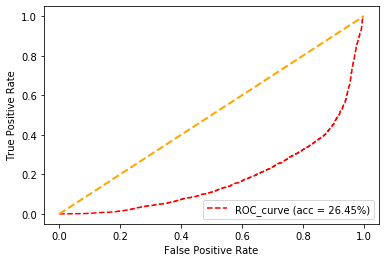

<Figure size 432x288 with 0 Axes>

In [43]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.005\\print-17-0.1349.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('protocol_3_Print_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

# REPLAY-ATTACK

>> model loaded: protocol_4-15-0.0946.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 74859 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           36471          10464
actual_real(1)            6227          21697

EER: 0.2230	HTER: 0.2230
>> finished


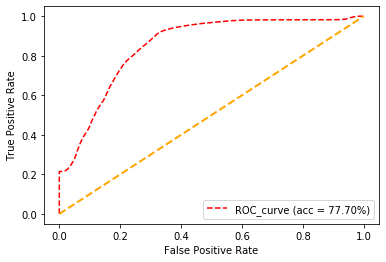

<Figure size 432x288 with 0 Axes>

In [11]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.001\\protocol_4-15-0.0946.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test\\protocol_4_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-09-0.0778.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 74859 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           39263           7672
actual_real(1)            4566          23358

EER: 0.1635	HTER: 0.1635
>> finished


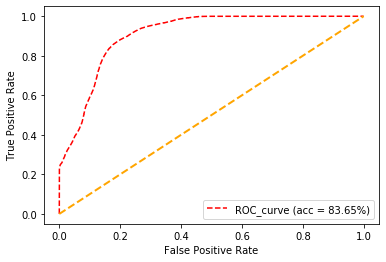

<Figure size 432x288 with 0 Axes>

In [12]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.01\\protocol_4-09-0.0778.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test\\protocol_4_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-18-0.0864.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 74859 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           38873           8062
actual_real(1)            4798          23126

EER: 0.1718	HTER: 0.1718
>> finished


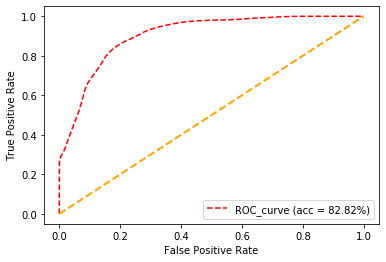

<Figure size 432x288 with 0 Axes>

In [13]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.005\\protocol_4-18-0.0864.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test\\protocol_4_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: replay-10-0.0633.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 74859 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           39420           7515
actual_real(1)            4472          23452

EER: 0.1601	HTER: 0.1601
>> finished


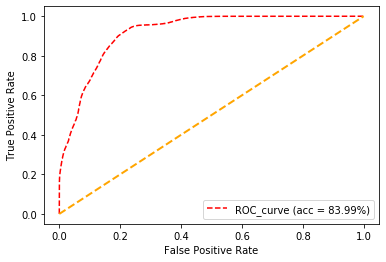

<Figure size 432x288 with 0 Axes>

In [14]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.001\\replay-10-0.0633.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test\\protocol_3_Replay_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: replay-02-0.0710.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 74859 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           37016           9919
actual_real(1)            5902          22022

EER: 0.2113	HTER: 0.2113
>> finished


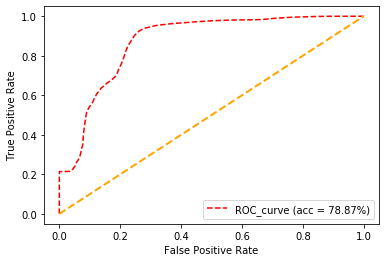

<Figure size 432x288 with 0 Axes>

In [15]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.01\\replay-02-0.0710.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test\\protocol_3_Replay_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: replay-02-0.0717.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 74859 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           36611          10324
actual_real(1)            6143          21781

EER: 0.2200	HTER: 0.2200
>> finished


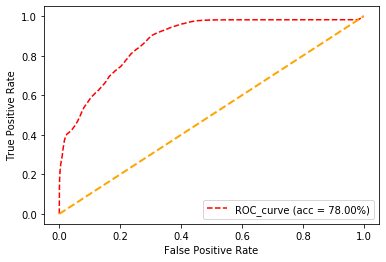

<Figure size 432x288 with 0 Axes>

In [16]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.005\\replay-02-0.0717.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test\\protocol_3_Replay_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-24-0.0809.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 74859 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           40187           6748
actual_real(1)            4028          23896

EER: 0.1440	HTER: 0.1440
>> finished


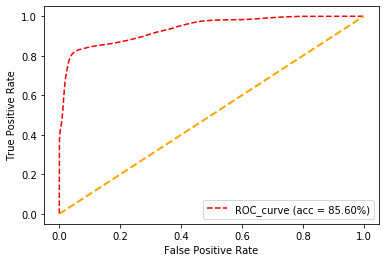

<Figure size 432x288 with 0 Axes>

In [17]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.001\\M_angle-24-0.0809.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test\\protocol_1_M_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-09-0.1228.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 74859 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           35970          10965
actual_real(1)            6524          21400

EER: 0.2336	HTER: 0.2336
>> finished


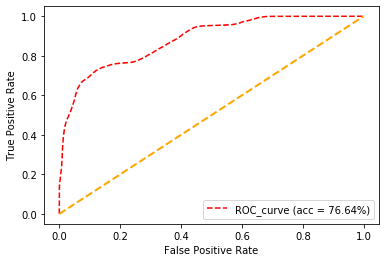

<Figure size 432x288 with 0 Axes>

In [18]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.01\\M_angle-09-0.1228.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test\\protocol_1_M_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-30-0.0905.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 74859 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           39874           7061
actual_real(1)            4201          23723

EER: 0.1504	HTER: 0.1504
>> finished


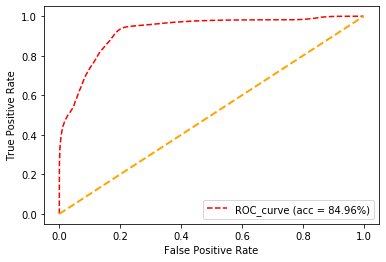

<Figure size 432x288 with 0 Axes>

In [19]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.005\\M_angle-30-0.0905.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test\\protocol_1_M_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

# Test_

>> model loaded: protocol_4-15-0.0946.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 72715 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           32850          11941
actual_real(1)            7445          20479

EER: 0.2666	HTER: 0.2666
>> finished


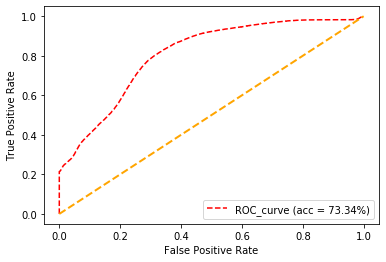

<Figure size 432x288 with 0 Axes>

In [20]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.001\\protocol_4-15-0.0946.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test_']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test_\\protocol_4_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-09-0.0778.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 72715 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           33697          11094
actual_real(1)            6917          21007

EER: 0.2477	HTER: 0.2477
>> finished


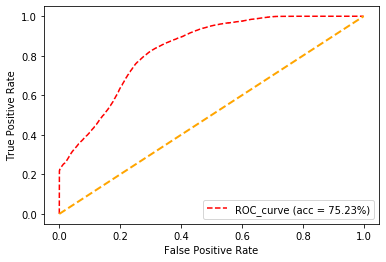

<Figure size 432x288 with 0 Axes>

In [21]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.01\\protocol_4-09-0.0778.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test_']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test_\\protocol_4_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-18-0.0864.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 72715 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           33806          10985
actual_real(1)            6849          21075

EER: 0.2453	HTER: 0.2453
>> finished


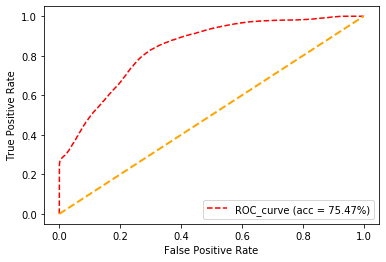

<Figure size 432x288 with 0 Axes>

In [22]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.005\\protocol_4-18-0.0864.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test_']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test_\\protocol_4_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: replay-10-0.0633.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 72715 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           34075          10716
actual_real(1)            6681          21243

EER: 0.2392	HTER: 0.2393
>> finished


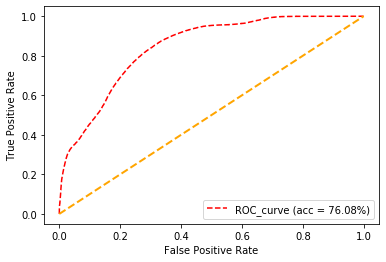

<Figure size 432x288 with 0 Axes>

In [23]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.001\\replay-10-0.0633.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test_']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test_\\protocol_3_Replay_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: replay-02-0.0710.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 72715 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           30505          14286
actual_real(1)            8909          19015

EER: 0.3190	HTER: 0.3190
>> finished


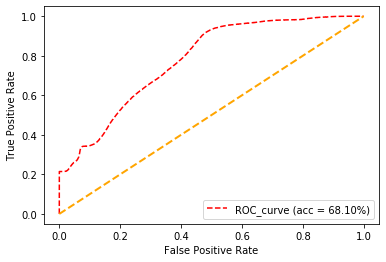

<Figure size 432x288 with 0 Axes>

In [24]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.01\\replay-02-0.0710.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test_']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test_\\protocol_3_Replay_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: replay-02-0.0717.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 72715 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           30056          14735
actual_real(1)            9187          18737

EER: 0.3290	HTER: 0.3290
>> finished


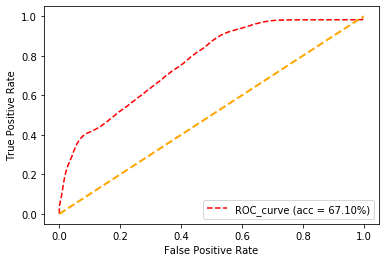

<Figure size 432x288 with 0 Axes>

In [25]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.005\\replay-02-0.0717.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test_']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test_\\protocol_3_Replay_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-24-0.0809.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 72715 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           36954           7837
actual_real(1)            4886          23038

EER: 0.1750	HTER: 0.1750
>> finished


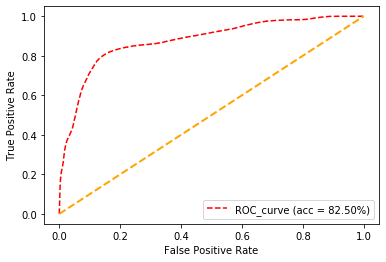

<Figure size 432x288 with 0 Axes>

In [26]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.001\\M_angle-24-0.0809.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test_']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test_\\protocol_1_M_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-09-0.1228.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 72715 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           32419          12372
actual_real(1)            7714          20210

EER: 0.2762	HTER: 0.2762
>> finished


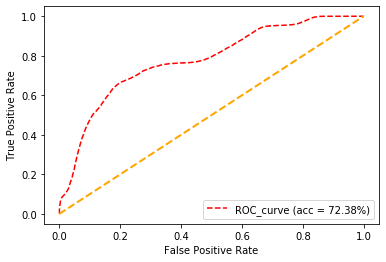

<Figure size 432x288 with 0 Axes>

In [27]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.01\\M_angle-09-0.1228.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test_']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test_\\protocol_1_M_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-30-0.0905.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 72715 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           34427          10364
actual_real(1)            6461          21463

EER: 0.2314	HTER: 0.2314
>> finished


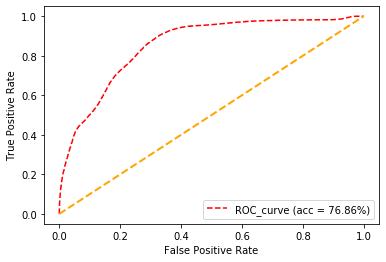

<Figure size 432x288 with 0 Axes>

In [28]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.005\\M_angle-30-0.0905.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test_']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\REPLAY-ATTACK\\test_\\protocol_1_M_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

# CASIA-FASD

>> model loaded: protocol_4-15-0.0946.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           14774          15653
actual_real(1)            5126           4836

EER: 0.5145	HTER: 0.5145
>> finished


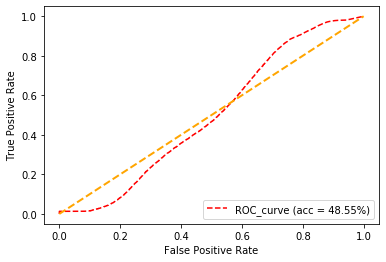

<Figure size 432x288 with 0 Axes>

In [29]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.001\\protocol_4-15-0.0946.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\CASIA-FASD\\protocol_4_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-09-0.0778.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           16467          13960
actual_real(1)            4571           5391

EER: 0.4588	HTER: 0.4588
>> finished


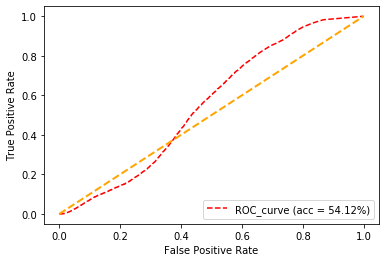

<Figure size 432x288 with 0 Axes>

In [30]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.01\\protocol_4-09-0.0778.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\CASIA-FASD\\protocol_4_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: protocol_4-18-0.0864.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           17929          12498
actual_real(1)            4092           5870

EER: 0.4108	HTER: 0.4108
>> finished


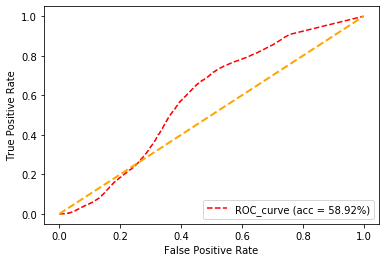

<Figure size 432x288 with 0 Axes>

In [31]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol4\\0.005\\protocol_4-18-0.0864.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\CASIA-FASD\\protocol_4_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-24-0.0809.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           15503          14924
actual_real(1)            4887           5075

EER: 0.4905	HTER: 0.4905
>> finished


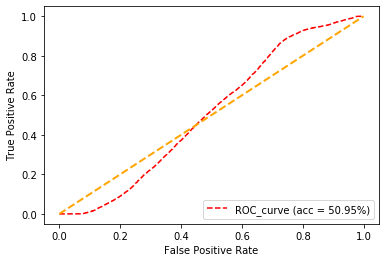

<Figure size 432x288 with 0 Axes>

In [32]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.001\\M_angle-24-0.0809.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\CASIA-FASD\\protocol_1_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-09-0.1228.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           17954          12473
actual_real(1)            4085           5877

EER: 0.4100	HTER: 0.4100
>> finished


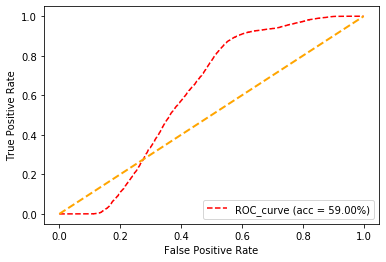

<Figure size 432x288 with 0 Axes>

In [33]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.01\\M_angle-09-0.1228.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\CASIA-FASD\\protocol_1_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: M_angle-30-0.0905.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           17810          12617
actual_real(1)            4131           5831

EER: 0.4146	HTER: 0.4147
>> finished


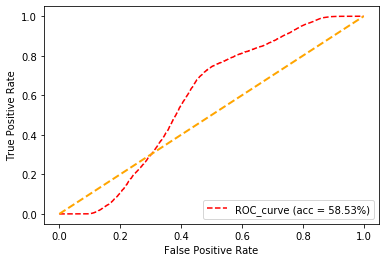

<Figure size 432x288 with 0 Axes>

In [35]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol1\\0.005\\M_angle-30-0.0905.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\CASIA-FASD\\protocol_1_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: print-05-0.1357.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           13374          17053
actual_real(1)            5583           4379

EER: 0.5604	HTER: 0.5604
>> finished


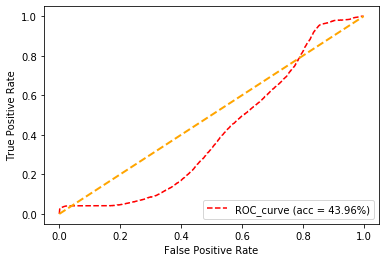

<Figure size 432x288 with 0 Axes>

In [36]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.001\\print-05-0.1357.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\CASIA-FASD\\protocol_3_001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: print-11-0.0936.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           12257          18170
actual_real(1)            5949           4013

EER: 0.5971	HTER: 0.5972
>> finished


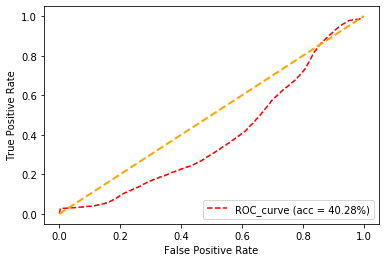

<Figure size 432x288 with 0 Axes>

In [37]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.01\\print-11-0.0936.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\CASIA-FASD\\protocol_3_01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: print-17-0.1349.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           12717          17710
actual_real(1)            5799           4163

EER: 0.5821	HTER: 0.5821
>> finished


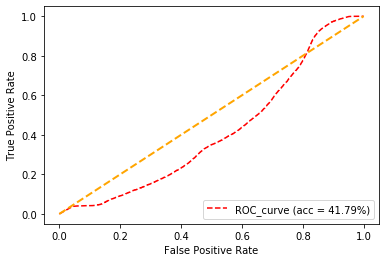

<Figure size 432x288 with 0 Axes>

In [38]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model\\trained_model_protocol3\\0.005\\print-17-0.1349.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='ROC_curve (acc = %0.2f%%)' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\crop\\CASIA-FASD\\protocol_3_005.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()